In [3]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import glob
file_pattern = r"D:\bigdataproject\output\flight_clusters_overall_summ\part-0000*.csv"
all_files = glob.glob(file_pattern)
data = pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True)

In [5]:
#show all columns
pd.set_option('display.max_columns', None)
data.columns
data['cluster']= data['cluster']+1

In [6]:
data.columns

Index(['Origin', 'Season', 'DayOfWeek', 'OriginState', 'OriginStateName',
       'Dest', 'DestCityName', 'DestState', 'DestStateName',
       'Reporting_Airline', 'cluster', 'DivertedFlights', 'TotalFlights',
       'DepartureDelayedFlights', 'ArrivalDelayedFlights',
       'TotalDepDelay_gt_15M', 'TotalArrDelay_gt_15M', 'TotalDepDelay',
       'TotalArrDelay', 'TotalCarrierDelay', 'TotalWeatherDelay',
       'TotalNASDelay', 'TotalSecurityDelay', 'TotalLateAircraftDelay'],
      dtype='object')

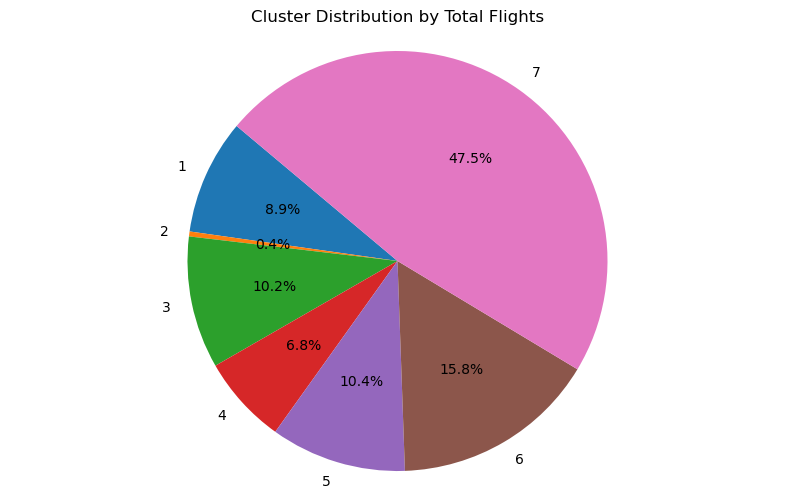

In [8]:
# Plot pie chart of each cluster by sum(total_flights)
def plot_pie_chart(data, column, title):
    # Calculate the sum of total_flights for each cluster
    cluster_counts = data.groupby(column)['TotalFlights'].sum()

    # Create a pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
# Plot pie chart for each cluster
plot_pie_chart(data, 'cluster', 'Cluster Distribution by Total Flights')


In [9]:
#sum total flights per cluster
cluster_summary = data.groupby('cluster').agg({
    'TotalFlights': 'sum',
    'ArrivalDelayedFlights': 'sum'
}).reset_index()
print("Cluster Summary:")
print(cluster_summary)

# Optional: Calculate percentage of delayed flights
cluster_summary['DelayPercentage'] = (cluster_summary['ArrivalDelayedFlights'] / cluster_summary['TotalFlights'] * 100).round(2)
# Display with percentage
print("\nCluster Summary with Delay Percentage:")
print(cluster_summary)

Cluster Summary:
   cluster  TotalFlights  ArrivalDelayedFlights
0        1        618899               269965.0
1        2         26423                 4705.0
2        3        710623                70262.0
3        4        475399               102217.0
4        5        729514                65656.0
5        6       1104295               236095.0
6        7       3317593               701066.0

Cluster Summary with Delay Percentage:
   cluster  TotalFlights  ArrivalDelayedFlights  DelayPercentage
0        1        618899               269965.0            43.62
1        2         26423                 4705.0            17.81
2        3        710623                70262.0             9.89
3        4        475399               102217.0            21.50
4        5        729514                65656.0             9.00
5        6       1104295               236095.0            21.38
6        7       3317593               701066.0            21.13


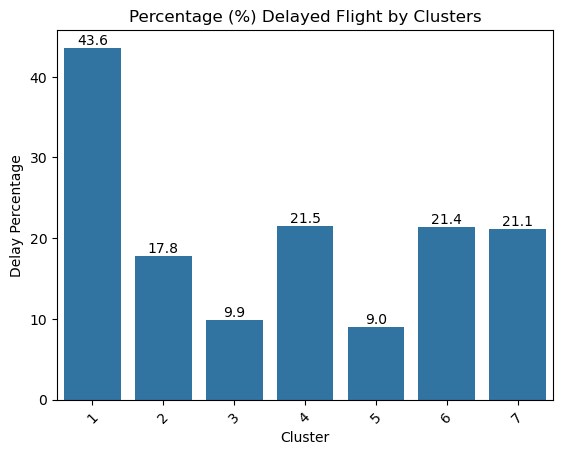

In [27]:
#Plot bar chart of each cluster by delay percentage with data labels

def plot_bar_chart(data, x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.show()
# Add data labels to the bar chart
def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black', rotation=0)

    return ax
# Create the bar plot
ax = sns.barplot(x='cluster', y='DelayPercentage', data=cluster_summary)
# Add data labels
ax = add_data_labels(ax)
plt.title('Percentage (%) Delayed Flight by Clusters')
plt.xlabel('Cluster')
plt.ylabel('Delay Percentage')
plt.xticks(rotation=45) 
plt.show()


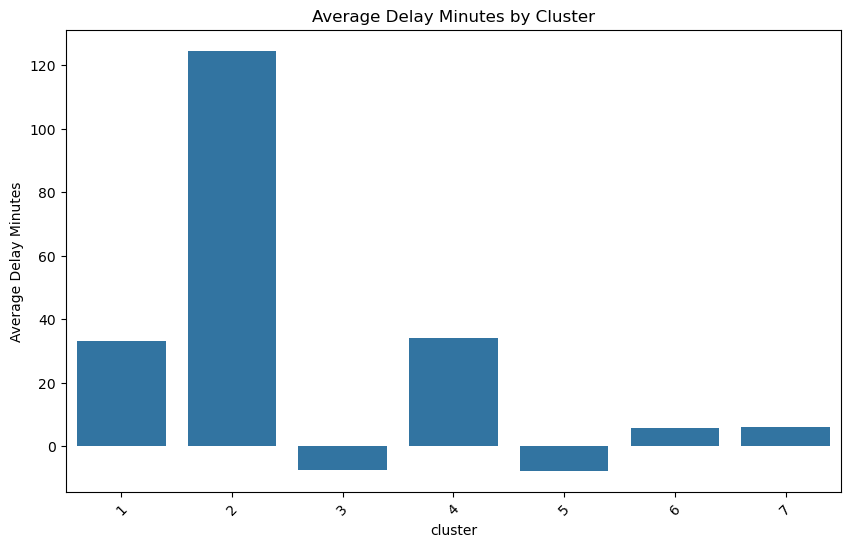

In [28]:
#Average Delay Minutes by Cluster ('ArrivalDelayMinutes'/'TotalFlights')
def plot_average_delay_by_cluster(data, cluster_column, delay_column, flights_column, title):
    # Calculate the average delay minutes per flight for each cluster
    data['AverageDelayMinutes'] = data[delay_column] / data[flights_column]
    average_delay = data.groupby(cluster_column)['AverageDelayMinutes'].mean().reset_index()

    # Plot the average delay by cluster
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster_column, y='AverageDelayMinutes', data=average_delay)
    plt.title(title)
    plt.xlabel(cluster_column)
    plt.ylabel('Average Delay Minutes')
    plt.xticks(rotation=45)
    plt.show()
# Call the function to plot average delay by cluster
plot_average_delay_by_cluster(data, 'cluster', 'TotalArrDelay', 'TotalFlights', 'Average Delay Minutes by Cluster')

In [40]:
#Grouped some clusters based on the analysis
conditions = [
    data['cluster'].isin([1, 2]),
    data['cluster'].isin([3, 5]),
    data['cluster'] == 4,
    data['cluster'].isin([6, 7])
]

choices = ['Group A', 'Group B', 'Group C', 'Group D']

# Create new column with grouped labels
data['cluster_group'] = np.select(conditions, choices, default='Other')


In [42]:
data.head()

,Origin,Season,DayOfWeek,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,Reporting_Airline,cluster,DivertedFlights,TotalFlights,DepartureDelayedFlights,ArrivalDelayedFlights,TotalDepDelay_gt_15M,TotalArrDelay_gt_15M,TotalDepDelay,TotalArrDelay,TotalCarrierDelay,TotalWeatherDelay,TotalNASDelay,TotalSecurityDelay,TotalLateAircraftDelay,AverageDelayMinutes,cluster_group
0,ABE,Fall,2,PA,Pennsylvania,ATL,"Atlanta, GA",GA,Georgia,9E,3,0,36,3.0,1.0,71.0,44.0,-96.0,-401.0,0.0,0.0,14.0,0.0,30.0,-11.138889,Group B
1,ABE,Fall,5,PA,Pennsylvania,ATL,"Atlanta, GA",GA,Georgia,9E,3,0,36,3.0,3.0,256.0,227.0,102.0,-220.0,61.0,132.0,12.0,0.0,22.0,-6.111111,Group B
2,ABE,Winter,3,PA,Pennsylvania,ATL,"Atlanta, GA",GA,Georgia,9E,6,1,34,8.0,9.0,744.0,733.0,619.0,308.0,99.0,0.0,77.0,0.0,557.0,9.058824,Group D
3,ABE,Winter,6,PA,Pennsylvania,ATL,"Atlanta, GA",GA,Georgia,9E,4,0,25,7.0,9.0,1220.0,1327.0,1154.0,1063.0,672.0,0.0,143.0,0.0,512.0,42.520000,Group C
4,ABE,Winter,7,PA,Pennsylvania,ATL,"Atlanta, GA",GA,Georgia,9E,6,0,35,5.0,8.0,439.0,466.0,398.0,60.0,246.0,0.0,70.0,0.0,150.0,1.714286,Group D


Cluster Summary:
  cluster_group  TotalFlights  ArrivalDelayedFlights
0       Group A        645322               274670.0
1       Group B       1440137               135918.0
2       Group C        475399               102217.0
3       Group D       4421888               937161.0

Cluster Summary with Delay Percentage:
  cluster_group  TotalFlights  ArrivalDelayedFlights  DelayPercentage
0       Group A        645322               274670.0            42.56
1       Group B       1440137               135918.0             9.44
2       Group C        475399               102217.0            21.50
3       Group D       4421888               937161.0            21.19


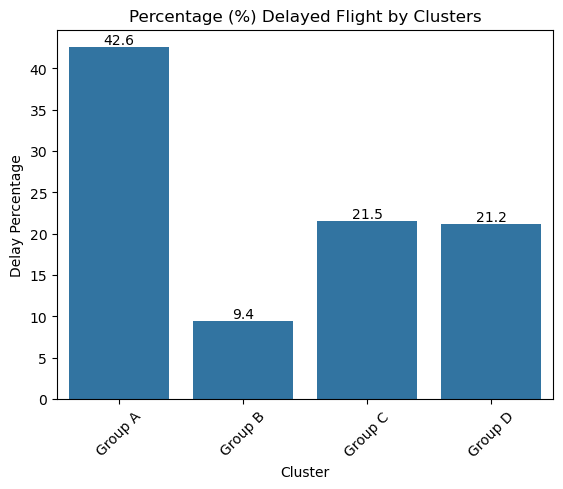

In [43]:
#Plot bar chart of each cluster by delay percentage with data labels
#sum total flights per cluster
cluster_summary = data.groupby('cluster_group').agg({
    'TotalFlights': 'sum',
    'ArrivalDelayedFlights': 'sum'
}).reset_index()
print("Cluster Summary:")
print(cluster_summary)

# Optional: Calculate percentage of delayed flights
cluster_summary['DelayPercentage'] = (cluster_summary['ArrivalDelayedFlights'] / cluster_summary['TotalFlights'] * 100).round(2)
# Display with percentage
print("\nCluster Summary with Delay Percentage:")
print(cluster_summary)
def plot_bar_chart(data, x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.show()
# Add data labels to the bar chart
def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black', rotation=0)

    return ax
# Create the bar plot
ax = sns.barplot(x='cluster_group', y='DelayPercentage', data=cluster_summary)
# Add data labels
ax = add_data_labels(ax)
plt.title('Percentage (%) Delayed Flight by Clusters')
plt.xlabel('Cluster')
plt.ylabel('Delay Percentage')
plt.xticks(rotation=45) 
plt.show()


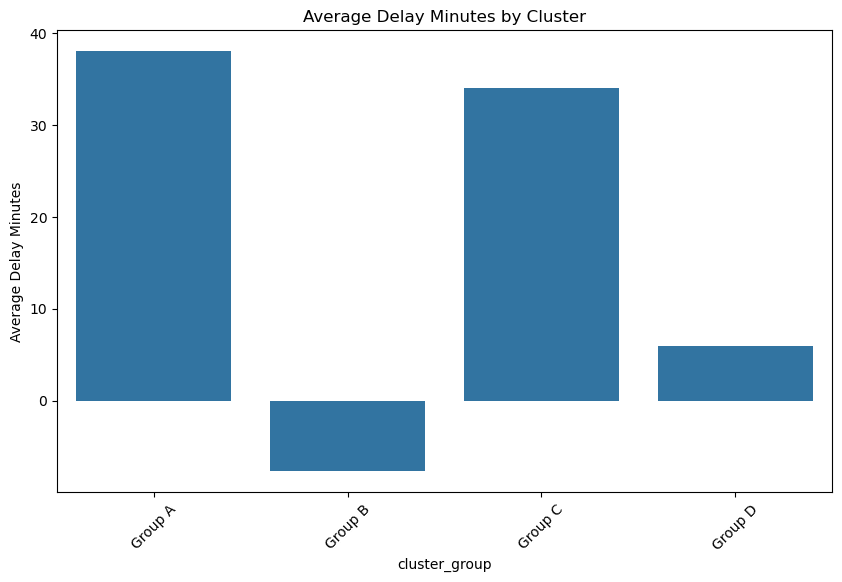

In [45]:
#Average Delay Minutes by Cluster ('ArrivalDelayMinutes'/'TotalFlights')
def plot_average_delay_by_cluster(data, cluster_column, delay_column, flights_column, title):
    # Calculate the average delay minutes per flight for each cluster
    data['AverageDelayMinutes'] = data[delay_column] / data[flights_column]
    average_delay = data.groupby(cluster_column)['AverageDelayMinutes'].mean().reset_index()

    # Plot the average delay by cluster
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster_column, y='AverageDelayMinutes', data=average_delay)
    plt.title(title)
    plt.xlabel(cluster_column)
    plt.ylabel('Average Delay Minutes')
    plt.xticks(rotation=45)
    plt.show()
# Call the function to plot average delay by cluster
plot_average_delay_by_cluster(data, 'cluster_group', 'TotalArrDelay', 'TotalFlights', 'Average Delay Minutes by Cluster')

C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\2388631094.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_flights, x='Season', y='TotalFlights', palette='Set2', ax=axes[i])
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\2388631094.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_flights, x='Season', y='TotalFlights', palette='Set2', ax=axes[i])
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\2388631094.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_flights, x='Season', y='TotalFli

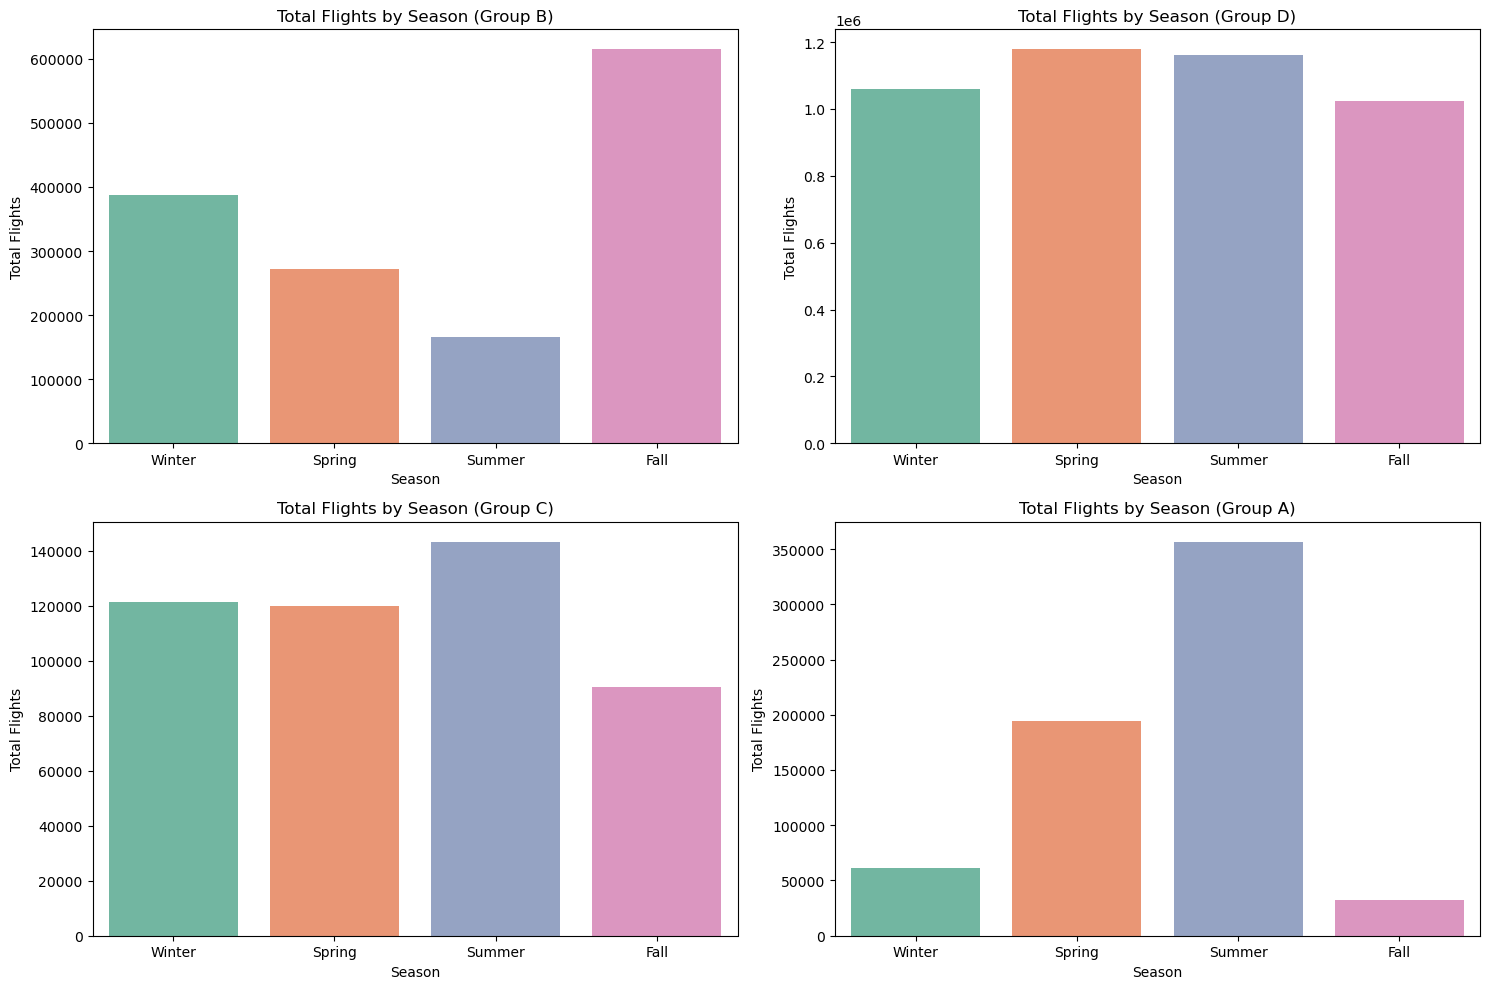

In [39]:
#make  4 plots for each cluster group as subplots
def plot_flights_by_season_all_groups():
    """
    Plots total flights by season for all cluster groups.
    """
    cluster_groups = data['cluster_group'].unique()
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, group in enumerate(cluster_groups):
        # Filter to the selected cluster group
        df_filtered = data[data['cluster_group'] == group]

        # Group by season and sum flights
        season_flights = df_filtered.groupby('Season')['TotalFlights'].sum().reset_index()

        # Sort seasons properly
        season_order = ['Winter', 'Spring', 'Summer', 'Fall']
        season_flights['Season'] = pd.Categorical(season_flights['Season'], categories=season_order, ordered=True)
        season_flights = season_flights.sort_values('Season')

        # Plot
        sns.barplot(data=season_flights, x='Season', y='TotalFlights', palette='Set2', ax=axes[i])
        axes[i].set_title(f'Total Flights by Season ({group})')
        axes[i].set_ylabel('Total Flights')
        axes[i].set_xlabel('Season')

    plt.tight_layout()
    plt.show()
# Call the function to plot all groups
plot_flights_by_season_all_groups()

C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\2598944084.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_origins, x='Origin', y='TotalFlights', palette='Set2', ax=axes[i])
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\2598944084.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_origins, x='Origin', y='TotalFlights', palette='Set2', ax=axes[i])
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\2598944084.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_origins, x='Origin', y='TotalFlights', pa

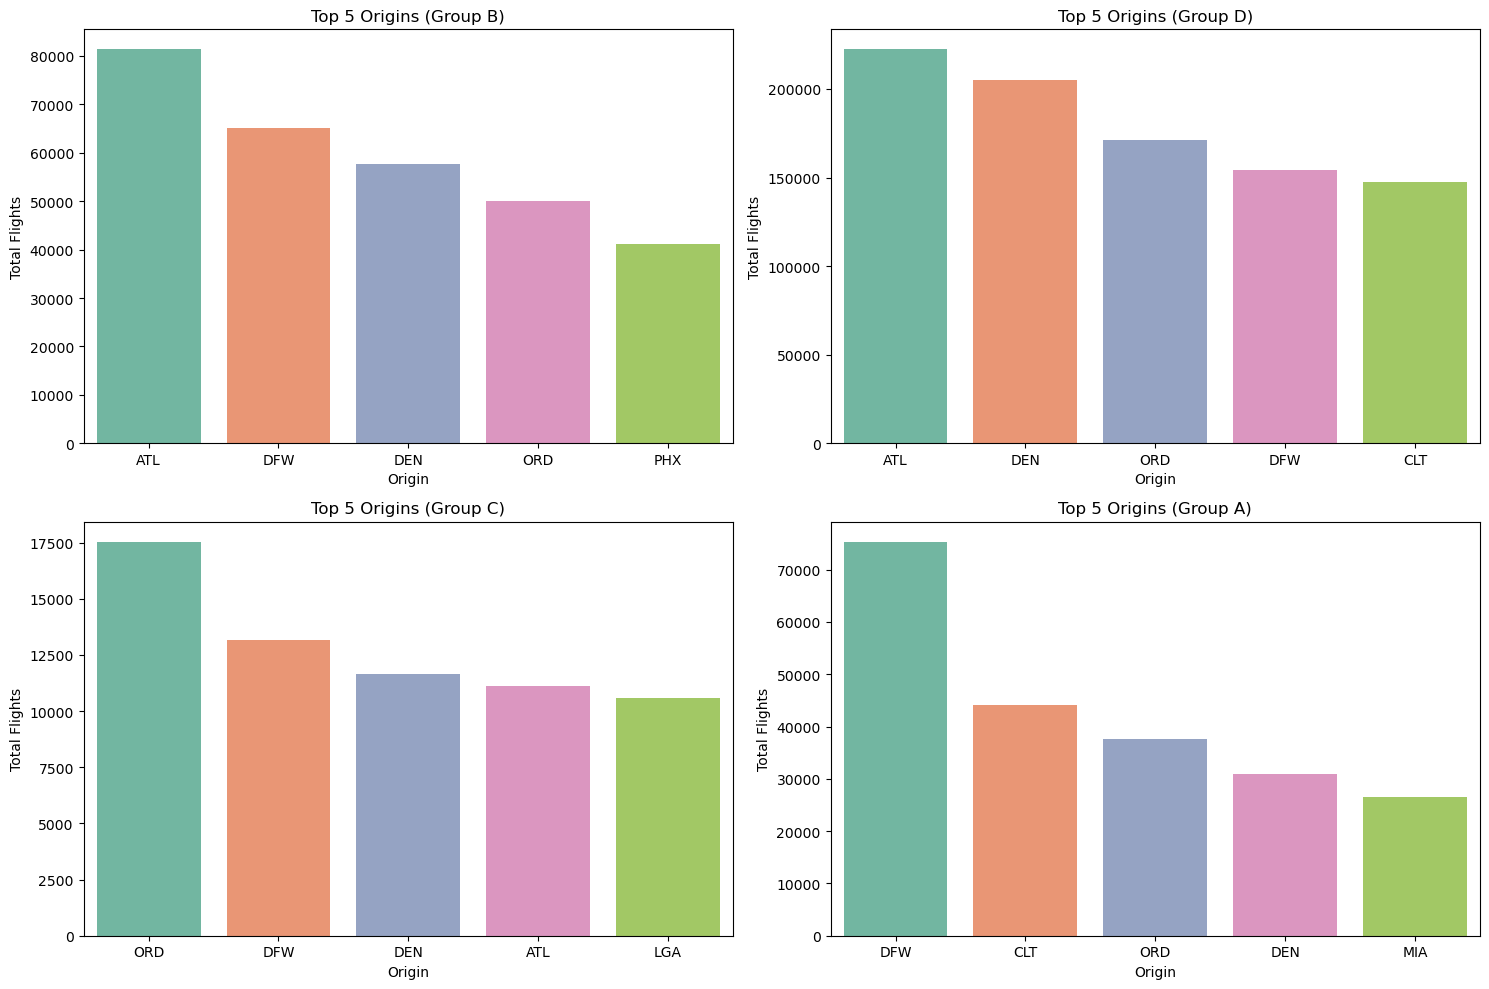

In [46]:
#make  4 plots for each cluster group as subplots of Top 5 origins
def plot_top_5_origins_by_cluster_group():
    """
    Plots top 5 origins for each cluster group.
    """
    cluster_groups = data['cluster_group'].unique()
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, group in enumerate(cluster_groups):
        # Filter to the selected cluster group
        df_filtered = data[data['cluster_group'] == group]

        # Group by origin and sum flights
        origin_flights = df_filtered.groupby('Origin')['TotalFlights'].sum().reset_index()

        # Sort and get top 5 origins
        top_origins = origin_flights.nlargest(5, 'TotalFlights')

        # Plot
        sns.barplot(data=top_origins, x='Origin', y='TotalFlights', palette='Set2', ax=axes[i])
        axes[i].set_title(f'Top 5 Origins ({group})')
        axes[i].set_ylabel('Total Flights')
        axes[i].set_xlabel('Origin')

    plt.tight_layout()
    plt.show()

# Call the function to plot top 5 origins for each cluster group
plot_top_5_origins_by_cluster_group()
#make  4 plots for each cluster group as subplots of Top 5 destinations



C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\1593425132.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_origins, x='Dest', y='TotalFlights', palette='Set2', ax=axes[i])
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\1593425132.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_origins, x='Dest', y='TotalFlights', palette='Set2', ax=axes[i])
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\1593425132.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_origins, x='Dest', y='TotalFlights', palette=

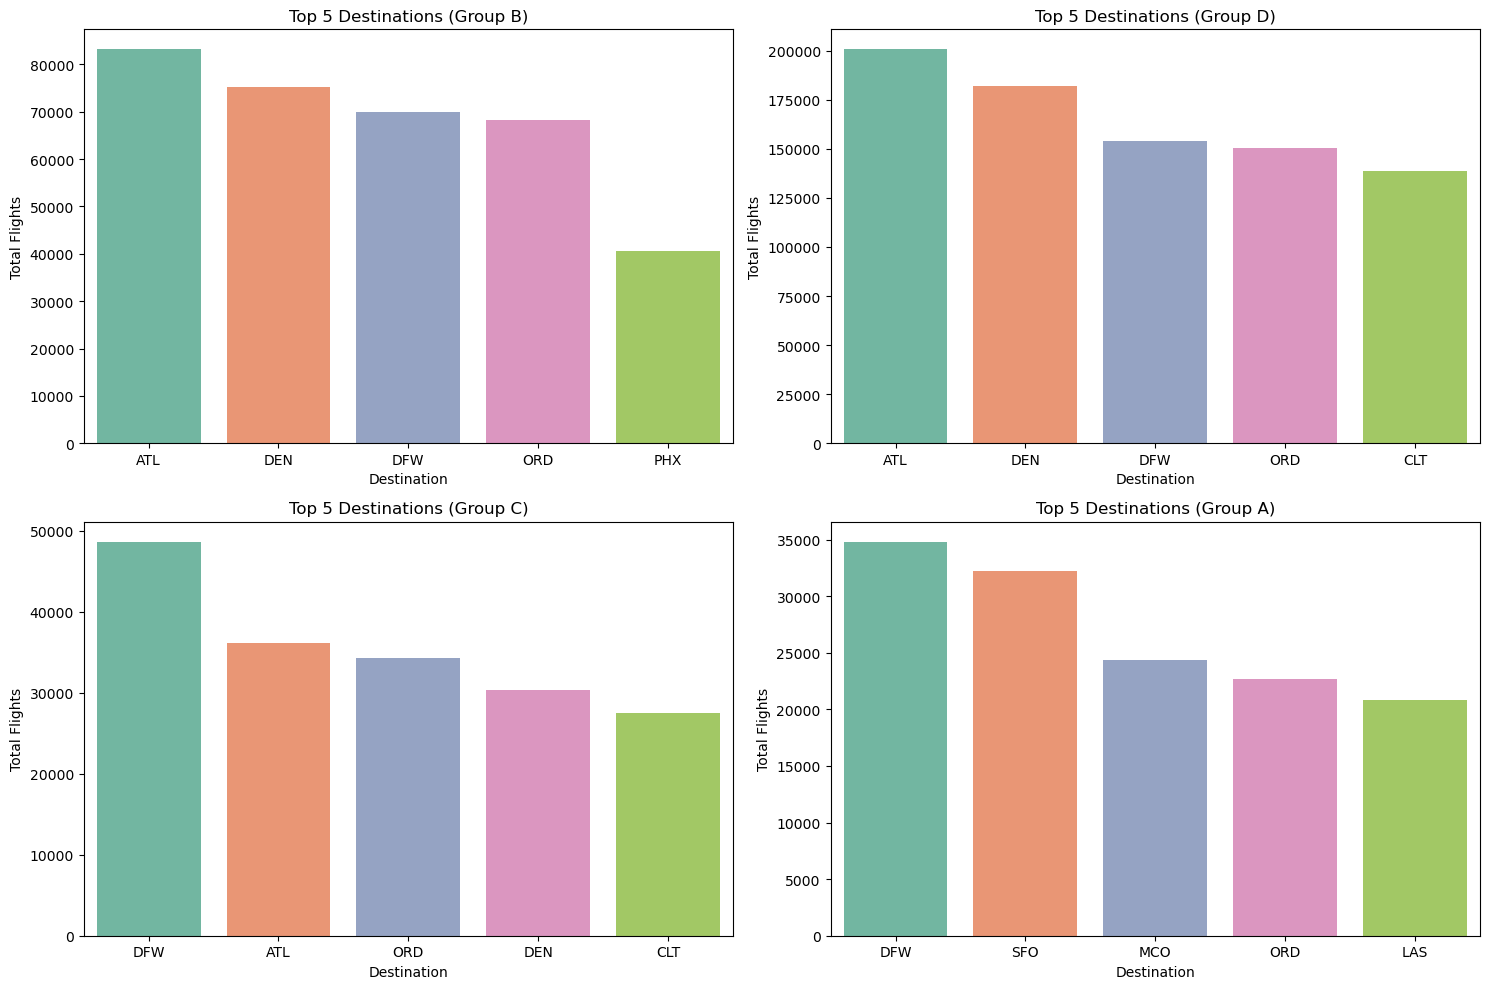

In [48]:
#make  4 plots for each cluster group as subplots of Top 5 origins
def plot_top_5_origins_by_cluster_group():
    """
    Plots top 5 origins for each cluster group.
    """
    cluster_groups = data['cluster_group'].unique()
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, group in enumerate(cluster_groups):
        # Filter to the selected cluster group
        df_filtered = data[data['cluster_group'] == group]

        # Group by origin and sum flights
        origin_flights = df_filtered.groupby('Dest')['TotalFlights'].sum().reset_index()

        # Sort and get top 5 origins
        top_origins = origin_flights.nlargest(5, 'TotalFlights')

        # Plot
        sns.barplot(data=top_origins, x='Dest', y='TotalFlights', palette='Set2', ax=axes[i])
        axes[i].set_title(f'Top 5 Destinations ({group})')
        axes[i].set_ylabel('Total Flights')
        axes[i].set_xlabel('Destination')

    plt.tight_layout()
    plt.show()

# Call the function to plot top 5 origins for each cluster group
plot_top_5_origins_by_cluster_group()
#make  4 plots for each cluster group as subplots of Top 5 destinations



C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\2637961228.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_type_flights, x='DayOfWeek', y='TotalFlights', palette='Set2', ax=axes[i])
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\2637961228.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_type_flights, x='DayOfWeek', y='TotalFlights', palette='Set2', ax=axes[i])
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\2637961228.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_type_flights, x='DayOfWee

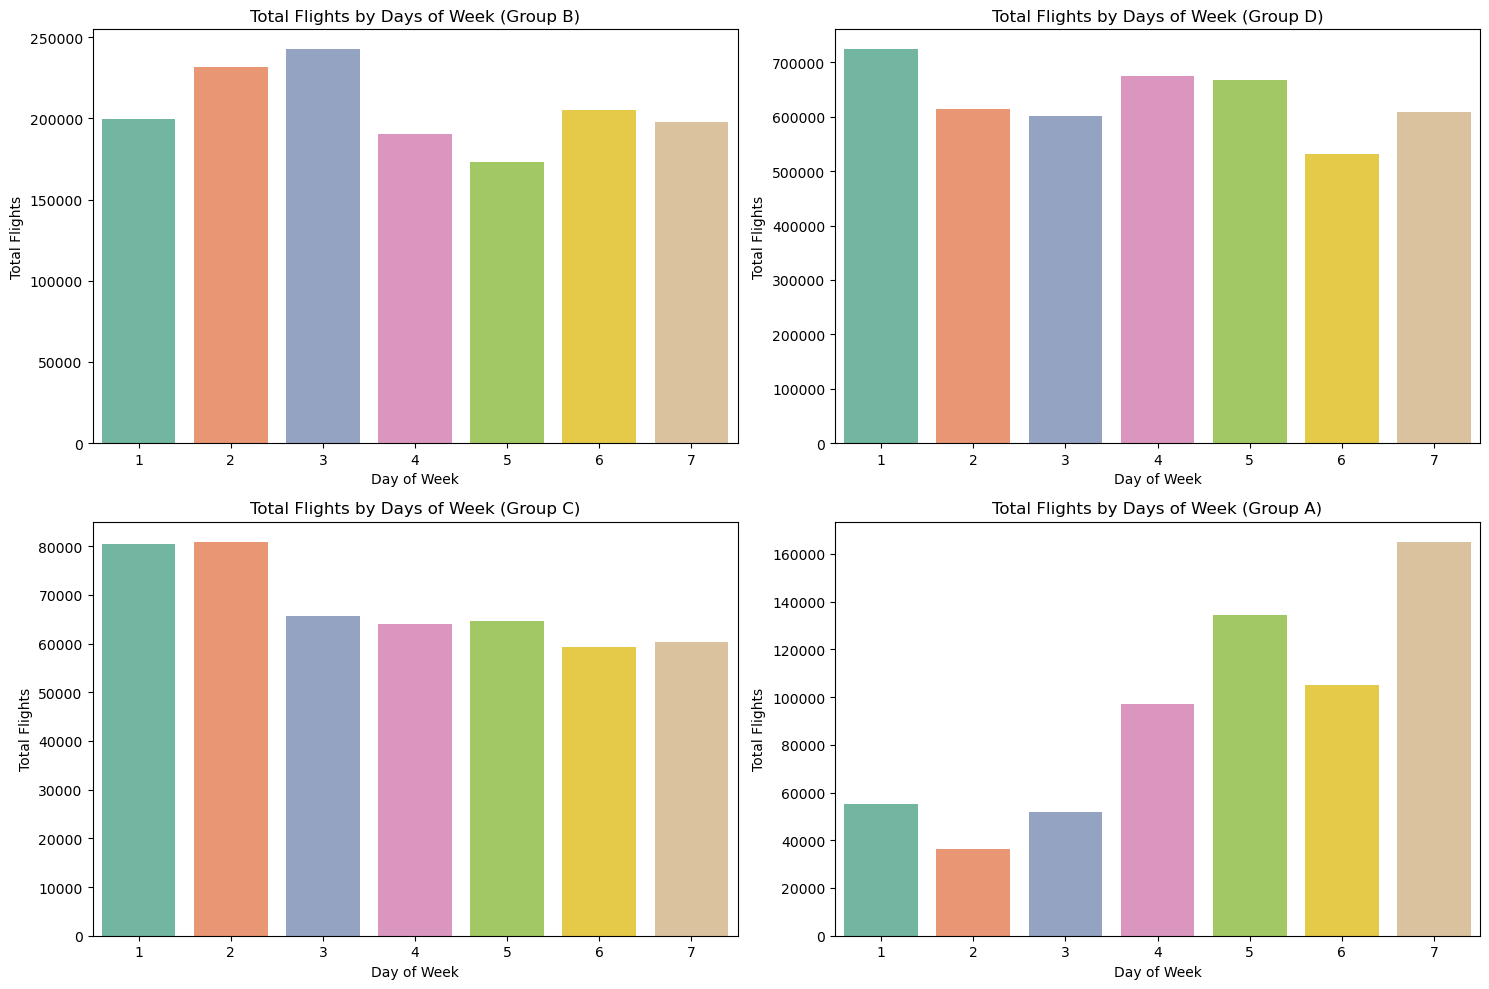

In [50]:
#make  4 plots for each cluster group as subplots of weekdays vs weekends
def plot_weekdays_vs_weekends_by_cluster_group():
    """
    Plots total flights on weekdays vs weekends for each cluster group.
    """
    cluster_groups = data['cluster_group'].unique()
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, group in enumerate(cluster_groups):
        # Filter to the selected cluster group
        df_filtered = data[data['cluster_group'] == group]

        # Group by day type and sum flights
        day_type_flights = df_filtered.groupby('DayOfWeek')['TotalFlights'].sum().reset_index()

        # Plot
        sns.barplot(data=day_type_flights, x='DayOfWeek', y='TotalFlights', palette='Set2', ax=axes[i])
        axes[i].set_title(f'Total Flights by Days of Week ({group})')
        axes[i].set_ylabel('Total Flights')
        axes[i].set_xlabel('Day of Week')

    plt.tight_layout()
    plt.show()
# Call the function to plot weekdays vs weekends for each cluster group
plot_weekdays_vs_weekends_by_cluster_group()

C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\2315478483.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_airlines, x='Reporting_Airline', y='TotalFlights', palette='Set2', ax=axes[i])
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\2315478483.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_airlines, x='Reporting_Airline', y='TotalFlights', palette='Set2', ax=axes[i])
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\2315478483.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_airlines, x='Repo

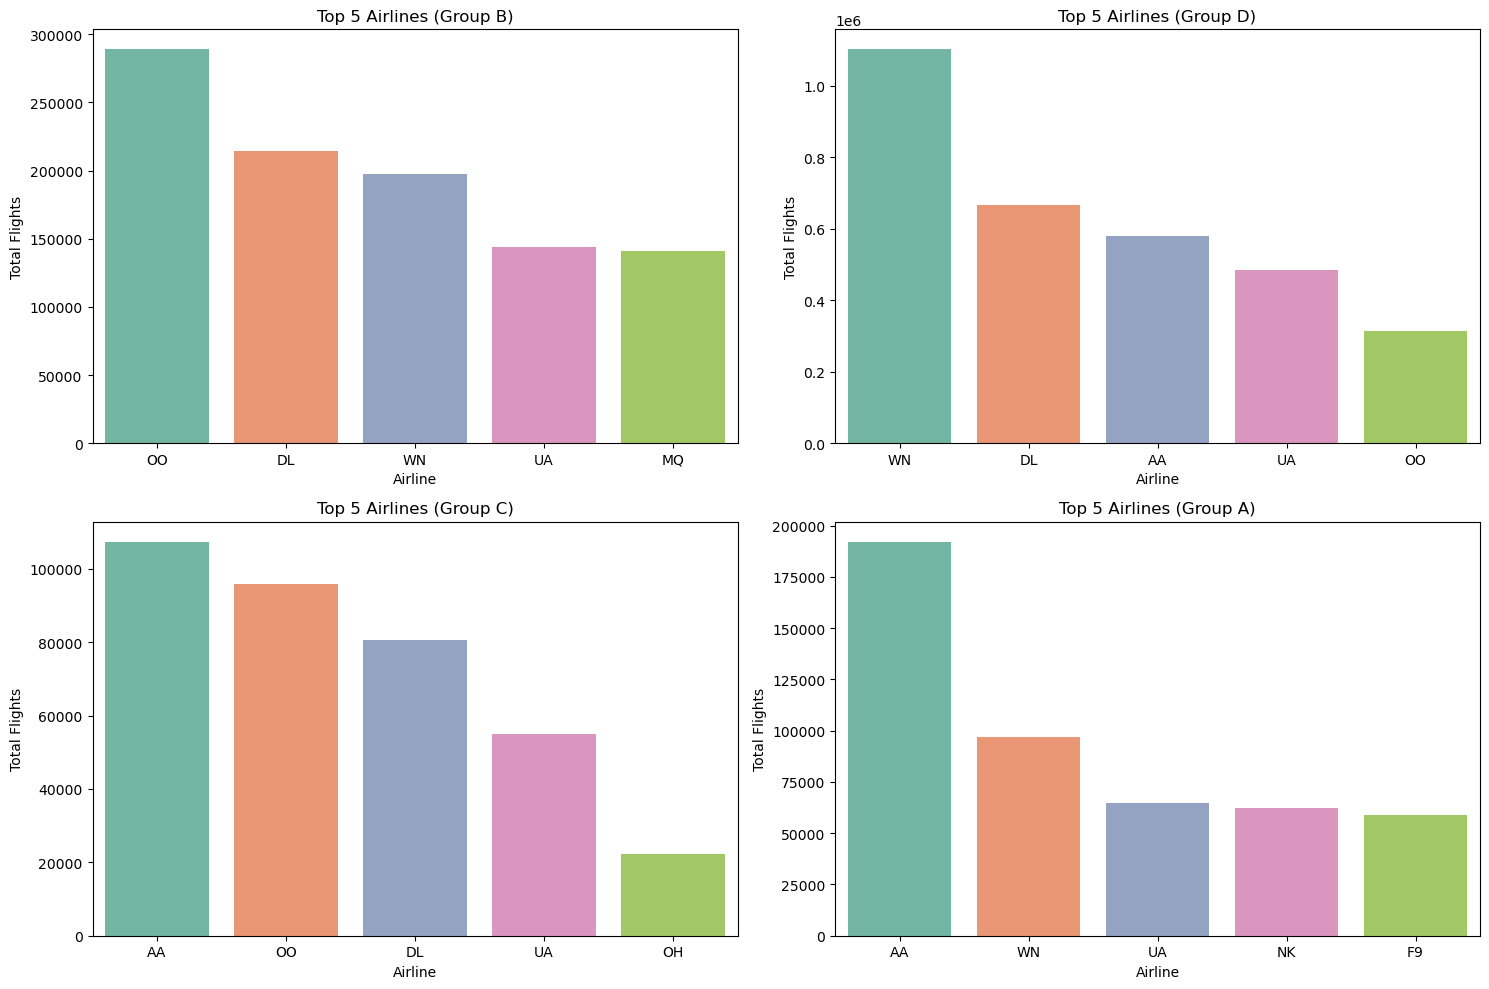

In [52]:
#make  4 plots for each cluster group as subplots of top 5 airlines
def plot_top_5_airlines_by_cluster_group():
    """
    Plots top 5 airlines for each cluster group.
    """
    cluster_groups = data['cluster_group'].unique()
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, group in enumerate(cluster_groups):
        # Filter to the selected cluster group
        df_filtered = data[data['cluster_group'] == group]

        # Group by airline and sum flights
        airline_flights = df_filtered.groupby('Reporting_Airline')['TotalFlights'].sum().reset_index()

        # Sort and get top 5 airlines
        top_airlines = airline_flights.nlargest(5, 'TotalFlights')

        # Plot
        sns.barplot(data=top_airlines, x='Reporting_Airline', y='TotalFlights', palette='Set2', ax=axes[i])
        axes[i].set_title(f'Top 5 Airlines ({group})')
        axes[i].set_ylabel('Total Flights')
        axes[i].set_xlabel('Airline')

    plt.tight_layout()
    plt.show()
# Call the function to plot top 5 airlines for each cluster group
plot_top_5_airlines_by_cluster_group()

C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\5168692.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Route'] = df_filtered['Origin'] + '-' + df_filtered['Dest']
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\5168692.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_routes, x='Route', y='TotalFlights', palette='Set2', ax=axes[i])
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\5168692.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

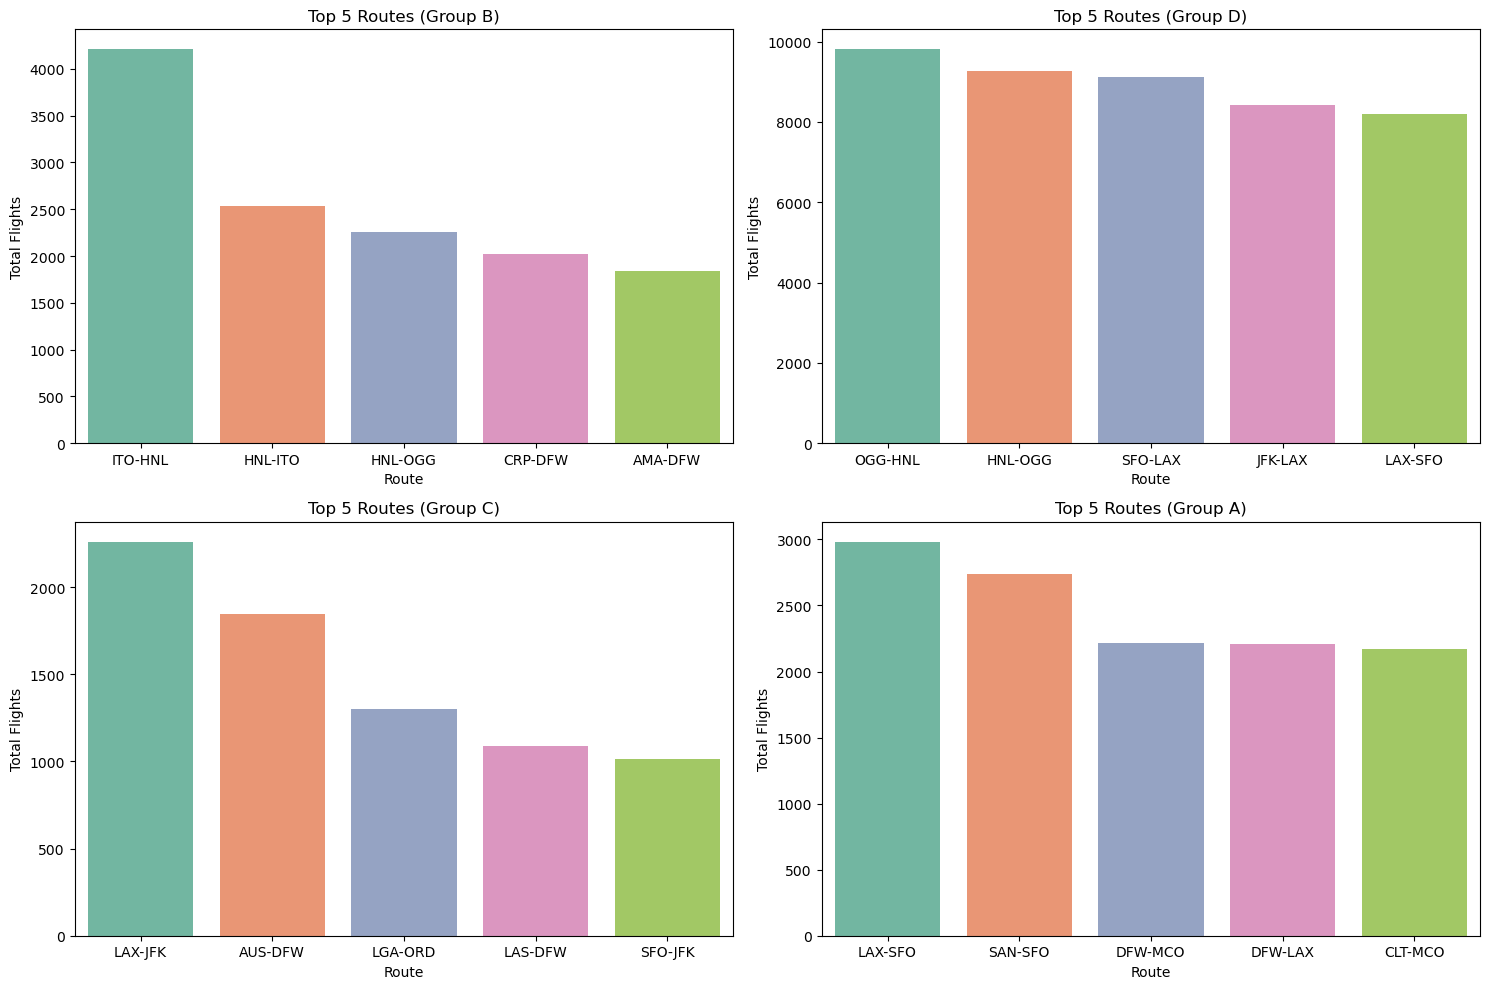

In [53]:
#make  4 plots for each cluster group as subplots of top 5 routes (origin-destination)
def plot_top_5_routes_by_cluster_group():
    """
    Plots top 5 routes (origin-destination) for each cluster group.
    """
    cluster_groups = data['cluster_group'].unique()
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, group in enumerate(cluster_groups):
        # Filter to the selected cluster group
        df_filtered = data[data['cluster_group'] == group]

        # Create a new column for the route
        df_filtered['Route'] = df_filtered['Origin'] + '-' + df_filtered['Dest']

        # Group by route and sum flights
        route_flights = df_filtered.groupby('Route')['TotalFlights'].sum().reset_index()

        # Sort and get top 5 routes
        top_routes = route_flights.nlargest(5, 'TotalFlights')

        # Plot
        sns.barplot(data=top_routes, x='Route', y='TotalFlights', palette='Set2', ax=axes[i])
        axes[i].set_title(f'Top 5 Routes ({group})')
        axes[i].set_ylabel('Total Flights')
        axes[i].set_xlabel('Route')

    plt.tight_layout()
    plt.show()
# Call the function to plot top 5 routes for each cluster group
plot_top_5_routes_by_cluster_group()


C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\128425154.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='DelayCause', y='AvgPerFlightDelay', ax=axes[i], palette='Set2')
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\128425154.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='DelayCause', y='AvgPerFlightDelay', ax=axes[i], palette='Set2')
C:\Users\anupam\AppData\Local\Temp\ipykernel_28252\128425154.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='DelayCause', y='AvgPerFlightDelay',

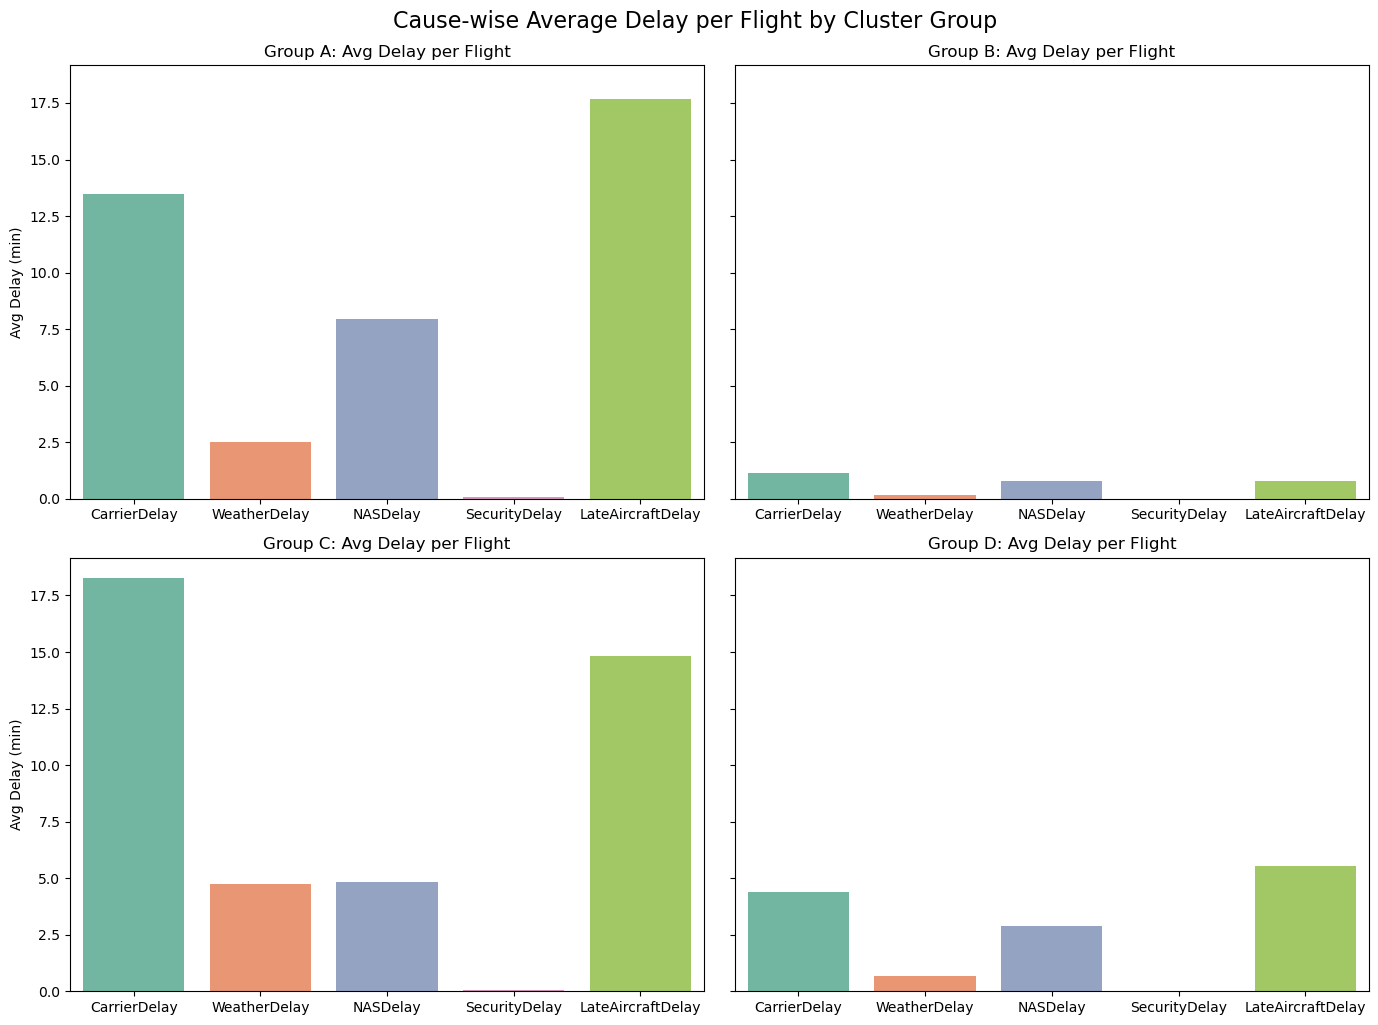

In [54]:
delay_causes = [
    'TotalCarrierDelay', 'TotalWeatherDelay', 'TotalNASDelay',
    'TotalSecurityDelay', 'TotalLateAircraftDelay'
]
for col in delay_causes:
    data[f'{col}_PerFlight'] = data[col] / data['TotalFlights']

# Aggregate average per-flight delay by group
group_avg = data.groupby('cluster_group')[[f'{col}_PerFlight' for col in delay_causes]].mean().reset_index()

# Melt for plotting
group_avg_melted = group_avg.melt(id_vars='cluster_group', var_name='DelayCause', value_name='AvgPerFlightDelay')
group_avg_melted['DelayCause'] = group_avg_melted['DelayCause'].str.replace('_PerFlight', '').str.replace('Total', '')

# Set up 4 subplots (1 per cluster_group)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()

groups = ['Group A', 'Group B', 'Group C', 'Group D']

for i, group in enumerate(groups):
    data = group_avg_melted[group_avg_melted['cluster_group'] == group]
    sns.barplot(data=data, x='DelayCause', y='AvgPerFlightDelay', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{group}: Avg Delay per Flight')
    axes[i].set_ylabel('Avg Delay (min)')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.suptitle("Cause-wise Average Delay per Flight by Cluster Group", fontsize=16, y=1.02)
plt.show()